In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
df=pd.read_csv('twitter_new.csv',encoding='latin1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df.columns=['target','id','date','flag','user','text']

In [6]:
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [8]:
df['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [9]:
df['target'] = df['target'].replace(4,1)

In [10]:
df['target'].unique()

array([0, 1], dtype=int64)

In [11]:
df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [12]:
df.drop(['id','date','flag','user'],axis=1,inplace=True)

In [13]:
df.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [14]:
df_pos = df[df['target'] == 1]
df_neg = df[df['target'] == 0]
df_pos = df_pos.iloc[:int(40000)]
df_neg = df_neg.iloc[:int(40000)]

In [15]:
df = pd.concat([df_neg, df_pos])

In [16]:
def clean_text(t):
    t = re.sub('http\S+\s*', ' ', t)
    t = re.sub('#\S+', '', t)
    t = re.sub('@\S+', '  ', t)
    t = re.sub('\s+', ' ', t)
    t = re.sub('[^a-zA-Z0-9]',' ',t)
    return t

In [17]:
df['clean_text']=df['text'].apply(lambda x: clean_text(x))

In [18]:
df.head()

,target,text,clean_text
0,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
4,0,@Kwesidei not the whole crew,not the whole crew


In [19]:
df.shape

(80000, 3)

In [20]:
df['clean_text']=[i.lower() for i in df['clean_text']]

In [21]:
df.head()

,target,text,clean_text
0,0,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...
4,0,@Kwesidei not the whole crew,not the whole crew


In [22]:
df['clean_text'] = df['clean_text'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [23]:
df.head()

,target,text,clean_text
0,0,is upset that he can't update his Facebook by ...,upset that can update his facebook texting and...
1,0,@Kenichan I dived many times for the ball. Man...,dived many times for the ball managed save the...
2,0,my whole body feels itchy and like its on fire,whole body feels itchy and like its fire
3,0,"@nationwideclass no, it's not behaving at all....",not behaving all mad why here because can see ...
4,0,@Kwesidei not the whole crew,not the whole crew


In [24]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

#add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making','time','good','watch','character']

# stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(ct):
    ct_tokenized = word_tokenize(ct)
    ct_new = " ".join([i for i in ct_tokenized  if i not in stop_words])
    return ct_new

# Removing stopwords
df['clean_text'] = [remove_stopwords(i) for i in df['clean_text']]

In [26]:
# # Begin Lemmatization 
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            
            lemmatized_sentence.append(word)
        else:        
            
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize_sentence(x))

In [28]:
df.head()

,target,text,clean_text
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest bound
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",behave mad see
4,0,@Kwesidei not the whole crew,whole crew


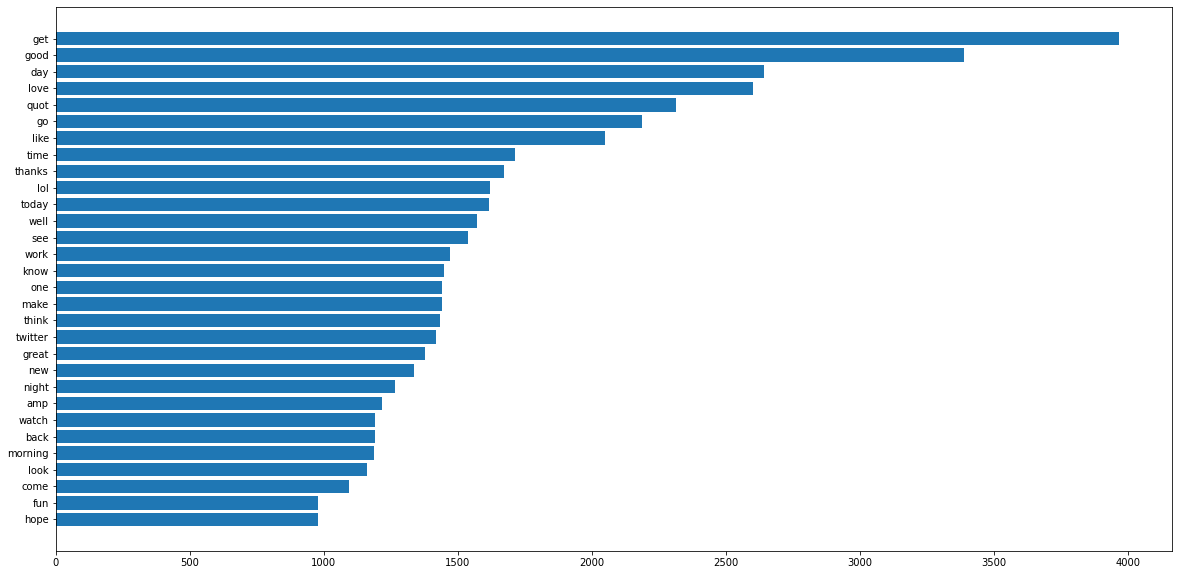

In [29]:
from nltk import FreqDist

pos_words_df = df[df['target']==1]['clean_text']

pos_words = ' '.join([text for text in pos_words_df])
pos_words = pos_words.split()
poswords_df = FreqDist(pos_words)

poswords_df = pd.DataFrame({'word':list(poswords_df.keys()), 'count':list(poswords_df.values())})

poswords_df = poswords_df.nlargest(columns="count", n = 30) 

poswords_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,10))
ax = plt.barh(poswords_df['word'], width = poswords_df['count'])
plt.show()

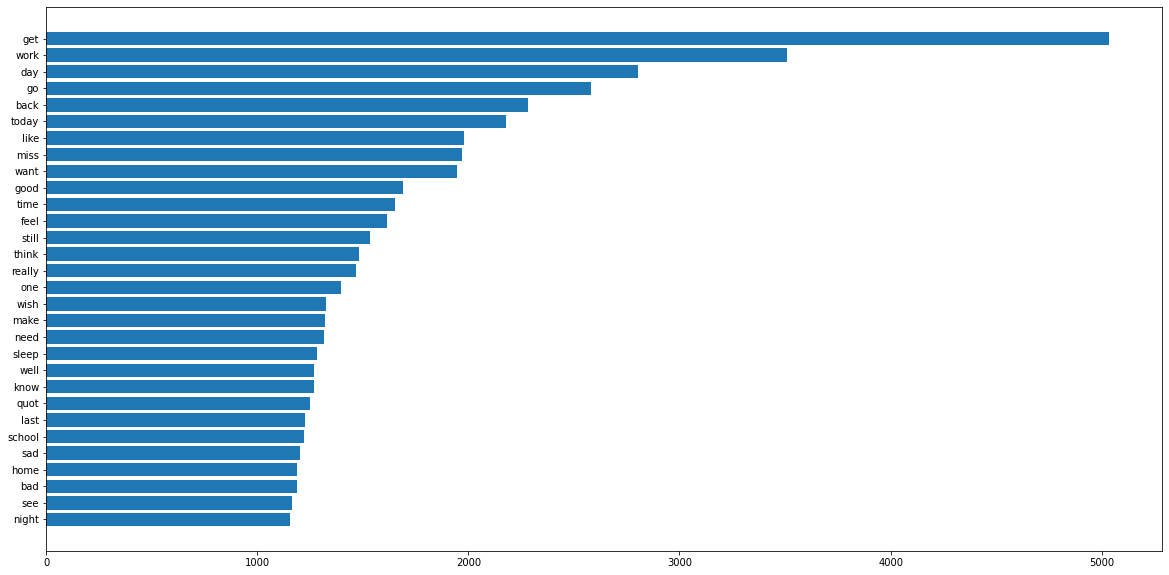

In [30]:
neg_words_df = df[df['target']==0]['clean_text']

neg_words = ' '.join([text for text in neg_words_df])
neg_words = neg_words.split()
negwords_df = FreqDist(neg_words)

negwords_df = pd.DataFrame({'word':list(negwords_df.keys()), 'count':list(negwords_df.values())})

negwords_df = negwords_df.nlargest(columns="count", n = 30) 

negwords_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,10))
ax = plt.barh(negwords_df['word'], width = negwords_df['count'])
plt.show()

In [31]:
add_words=[]
l1=list(poswords_df['word'])
l2=list(negwords_df['word'])
for i in l1:
    if i in l2:
        add_words.append(i)
print(*add_words)

back night think make one know work see well today time like go quot day good get


In [32]:
stop_words.extend(add_words)

def remove_stopwords(ct):
    ct_tokenized = word_tokenize(ct)
    ct_new = " ".join([i for i in ct_tokenized  if i not in stop_words])
    return ct_new

# Removing stopwords
df['clean_text'] = [remove_stopwords(i) for i in df['clean_text']]

In [33]:
df.head()

,target,text,clean_text
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
1,0,@Kenichan I dived many times for the ball. Man...,dive many ball manage save rest bound
2,0,my whole body feels itchy and like its on fire,whole body feel itchy fire
3,0,"@nationwideclass no, it's not behaving at all....",behave mad
4,0,@Kwesidei not the whole crew,whole crew


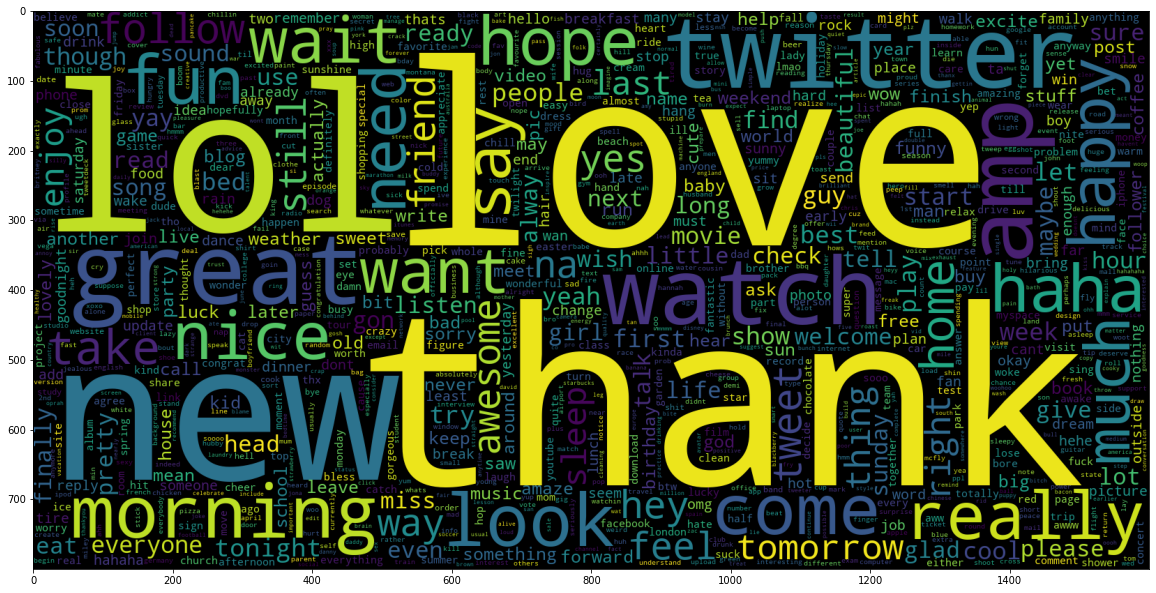

In [78]:
from wordcloud import WordCloud
df_pos = df['clean_text'][40000:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_pos))
plt.imshow(wc)

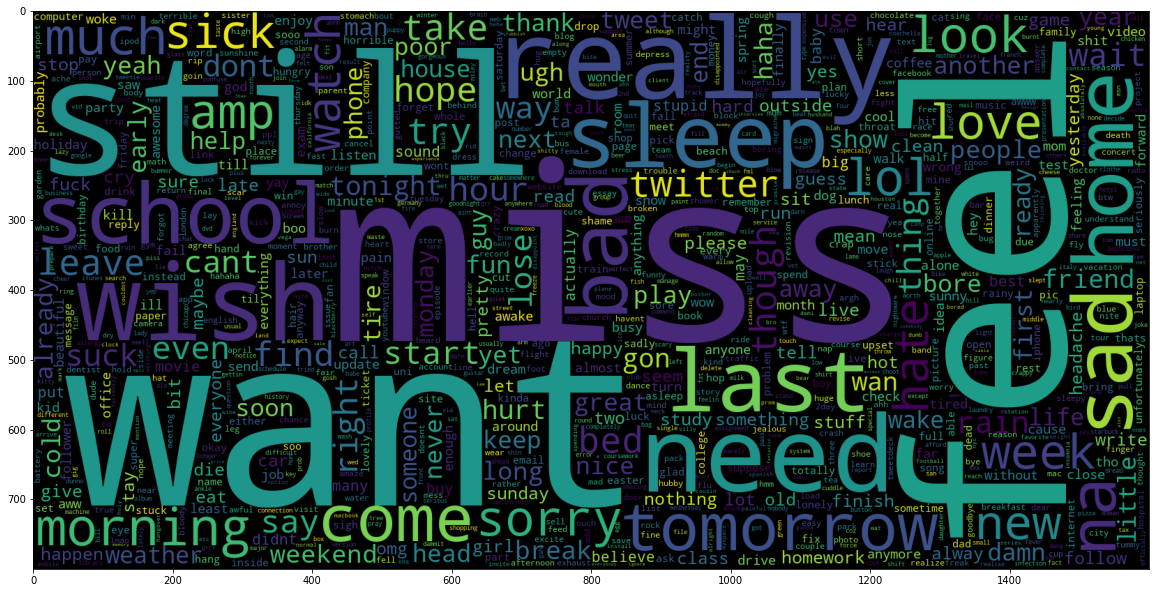

In [79]:
df_neg = df['clean_text'][:40000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df_neg))
plt.imshow(wc)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2500)
 
X=tfidf.fit_transform(df['clean_text']).toarray()
y = df['target'].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=5)

# Model 1- Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred=log_reg.predict(X_test)
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
0,0,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
15995,1,1
15996,1,1
15997,0,0
15998,0,1


Text(0.5, 15.0, 'Predicted')

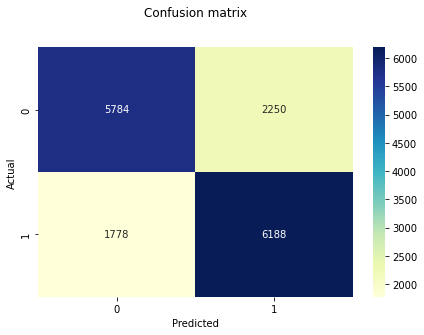

In [38]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,log_reg.predict(X_test))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [39]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      8034
           1       0.73      0.78      0.75      7966

    accuracy                           0.75     16000
   macro avg       0.75      0.75      0.75     16000
weighted avg       0.75      0.75      0.75     16000



In [40]:
#AUROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

0.8278147961547555

# Model 2- Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(X_test)
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
0,0,0
1,0,1
2,0,0
3,1,0
4,1,0
...,...,...
15995,1,1
15996,1,1
15997,0,1
15998,0,1


Text(0.5, 15.0, 'Predicted')

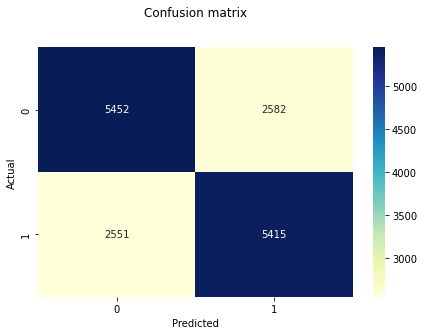

In [49]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,dt.predict(X_test))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [50]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      8034
           1       0.68      0.68      0.68      7966

    accuracy                           0.68     16000
   macro avg       0.68      0.68      0.68     16000
weighted avg       0.68      0.68      0.68     16000



In [51]:
#AUROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.6786955089376301

# Model 3- Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [53]:
y_pred = clf.predict(X_test)
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
0,0,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
15995,1,1
15996,1,1
15997,0,0
15998,0,1


Text(0.5, 15.0, 'Predicted')

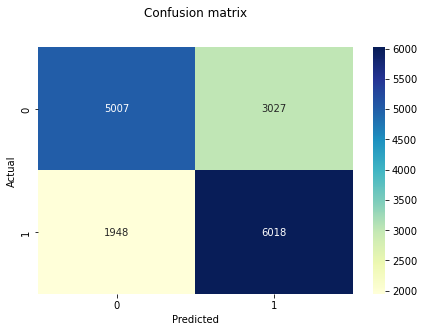

In [54]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [55]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67      8034
           1       0.67      0.76      0.71      7966

    accuracy                           0.69     16000
   macro avg       0.69      0.69      0.69     16000
weighted avg       0.69      0.69      0.69     16000



In [56]:
#AUROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.7075240296527856

# Model 4- Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 11, max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

In [67]:
y_pred = rf.predict(X_test)
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
0,0,0
1,0,0
2,0,1
3,1,1
4,1,0
...,...,...
15995,1,1
15996,1,1
15997,0,1
15998,0,1


Text(0.5, 15.0, 'Predicted')

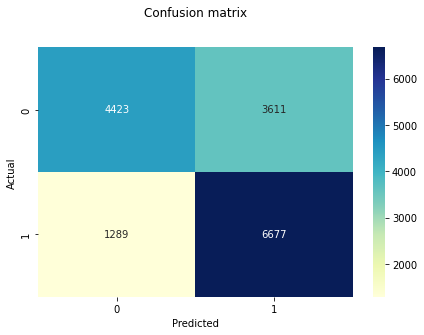

In [72]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [73]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64      8034
           1       0.65      0.84      0.73      7966

    accuracy                           0.69     16000
   macro avg       0.71      0.69      0.69     16000
weighted avg       0.71      0.69      0.69     16000



In [74]:
#AUROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.7689083259066367

# Conclusion:
# The F1-Score for class 0 and class 1 are:
# Class 0: Logistic Regression (0.74)> Decision Tree(0.68) > Naive Bayes(0.67) > Random Forest(0.64)
# Class 1: Logistic Regression (0.75)> Random Forest(0.73) > Naive Bayes(0.71)>Decision Tree(0.68)

# The AUROC score for Logsitic Regression is 0.82 which is the highest among all models. So Logistic Regression is the best model for this project.